In [102]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.model_selection import KFold
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [103]:
df = pd.read_csv('cars.txt')
df['horsepower'] = pd.to_numeric(df.horsepower, errors='coerce')
df = df[~df.horsepower.isna()]
df[['is_usa', 'is_mexico']] = pd.get_dummies(df.origin)[[1,2]]
df = df.drop(columns=['origin', 'car_name'])
df['intercept'] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model           392 non-null int64
is_usa          392 non-null uint8
is_mexico       392 non-null uint8
intercept       392 non-null int64
dtypes: float64(5), int64(3), uint8(2)
memory usage: 28.3 KB


In [104]:
df.head(3)

mpg  cylinders  displacement  horsepower  weight  acceleration  model  \
0  18.0          8         307.0       130.0  3504.0          12.0     70   
1  15.0          8         350.0       165.0  3693.0          11.5     70   
2  18.0          8         318.0       150.0  3436.0          11.0     70   

   is_usa  is_mexico  intercept  
0       1          0          1  
1       1          0          1  
2       1          0          1

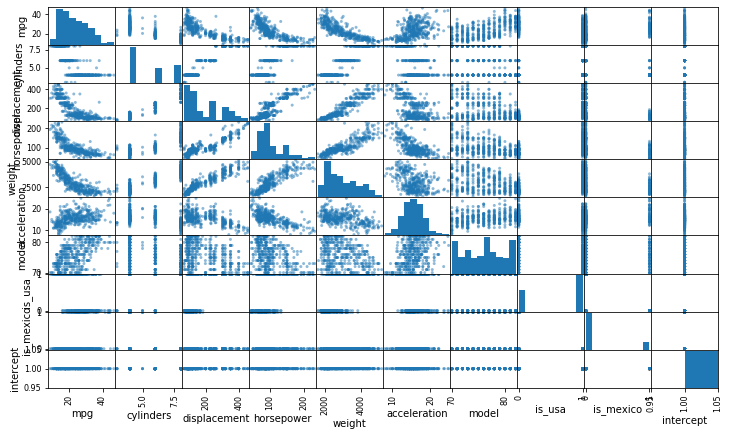

In [105]:
scatter_matrix(df, figsize=(12, 7));

In [106]:
corr = df.corr()
corr

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model         0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
is_usa       -0.565161   0.610494      0.655936    0.489625  0.600978   
is_mexico     0.244313  -0.352324     -0.371633   -0.284948 -0.293841   
intercept          NaN        NaN           NaN         NaN       NaN   

              acceleration     model    is_usa  is_mexico  intercept  
mpg               0.423329  0.580541 -0.565161   0.244313        NaN  
cylinders        -0.504683 -0.345647  0.610494  -0.352324        NaN  
displacement     -0.543800 -0.369855  0.655936  -0.371633        NaN  
horsepower       -0.689196 -0.416361  0.489625  -0.284948        NaN  
weight           -0.416839 -0.309120  0.600978  -0.293841        NaN  
acceleration      1.000000  0.290316 -0.258224   0.208298        NaN  
model             0.290316  1.000000 -0.136065  -0.037745        NaN  
is_usa           -0.258224 -0.136065  1.000000  -0.591434        NaN  
is_mexico         0.208298 -0.037745 -0.591434   1.000000        NaN  
intercept              NaN       NaN       NaN        NaN        NaN

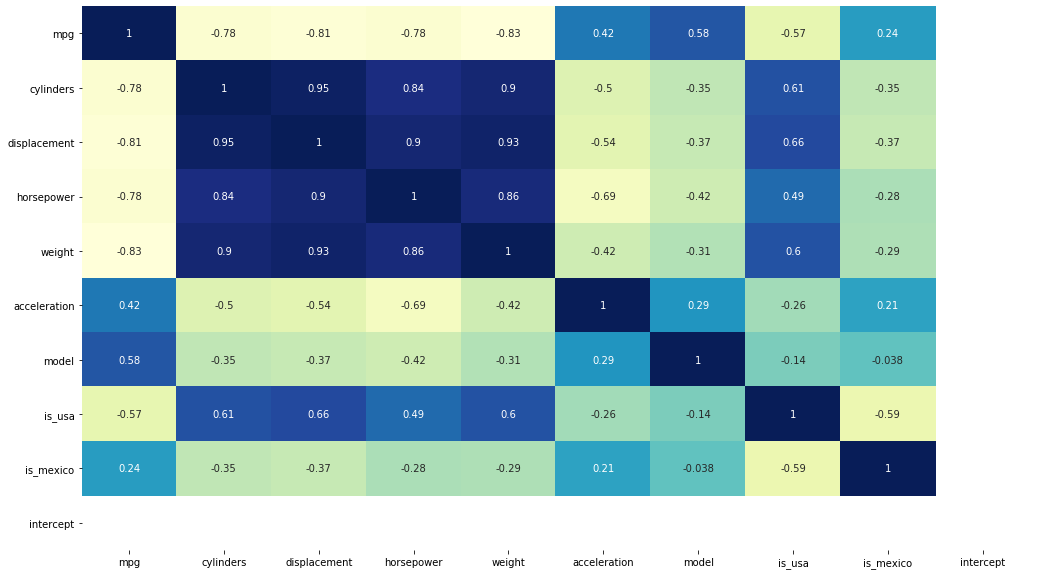

In [107]:
plt.figure(figsize=(17, 10))
sns.heatmap(corr, annot=True, cbar=False, cmap='YlGnBu');

In [108]:
# pick features correlated with the target
# make sure features are not highly correlated with other features

In [109]:
# cylinders is correlated with mpg
# but cylinders is also correlated with displacement, horsepower and weight

In [110]:
y = df.mpg
X = df.drop(columns=['mpg'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     171.6
Date:                Wed, 11 Sep 2019   Prob (F-statistic):          3.10e-104
Time:                        21:53:03   Log-Likelihood:                -769.61
No. Observations:                 294   AIC:                             1557.
Df Residuals:                     285   BIC:                             1590.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.3766      0.393     -0.959      0.338      -1.150       0.396
displacement     0.0190      0.009      2.074      0.039       0.001       0.037
horsepower      -0.0217      0.016     -1.356      0.176      -0.053       0.010
weight          -0.0063      0.001     -8.303      0.000      -0.008      -0.005
acceleration     0.0375      0.113      0.333      0.739      -0.184       0.259
model            0.7961      0.063     12.666      0.000       0.672       0.920
is_usa          -3.2447      0.643     -5.050      0.000      -4.509      -1.980
is_mexico       -0.2013      0.690     -0.292      0.771      -1.560       1.157
intercept      -15.9525      5.710     -2.794      0.006     -27.191      -4.714
==============================================================================
Omnibus:                       19.402   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.919
Skew:                           0.512   Prob(JB):                     3.88e-06
Kurtosis:                       3.993   Cond. No.                     9.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
sns.heatmap(results.pvalues.sort_values().to_frame(), annot=True, cmap="Blues", xticklabels=False);

In [112]:
y_hat = results.predict(X_test)
print('r2:', r2_score(y_test, y_hat))
print('rmse:', mean_squared_error(y_test, y_hat) ** 0.5)

r2: 0.7976095117999185
rmse: 3.1948681050544807


In [113]:
metrics = []
for train_index, test_index in KFold(n_splits=5).split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LinearRegression().fit(X_train, y_train)
    y_hat = model.predict(X_test)
    r2 = r2_score(y_test, y_hat)
    metrics.append(r2)

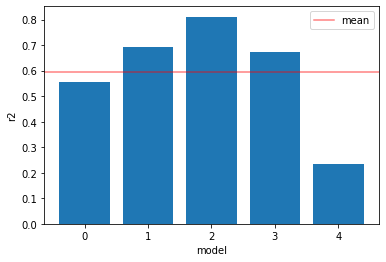

In [114]:
metrics = np.array(metrics)
plt.bar(range(5), metrics);
plt.axhline(y=metrics.mean(), color='r', alpha=0.5, label='mean');
plt.xlabel('model');
plt.ylabel('r2');
plt.legend();